### 1. LOADING FILES

In [1]:
import pickle 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [3]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,f1_score,confusion_matrix

In [5]:
train=pd.read_csv('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\df_train_balanced.csv',sep=',')
test=pd.read_csv('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\df_test_balanced.csv',sep=',')
X_test=test[['Código Distrito Centro','Age_range_code','Nationality_code','Sexo_code']]
X_train=train[['Código Distrito Centro','Age_range_code','Nationality_code','Sexo_code']]
y_test=test['Código Tipo Supuesto Urgente']
y_train=train['Código Tipo Supuesto Urgente']

In [5]:
train['Código Tipo Supuesto Urgente'].value_counts()

40.0    6606
30.0    5862
50.0    4273
10.0    2730
20.0    1828
Name: Código Tipo Supuesto Urgente, dtype: int64

In [6]:
test['Código Tipo Supuesto Urgente'].value_counts()

40.0    2203
30.0    1953
50.0    1431
10.0     937
20.0     576
Name: Código Tipo Supuesto Urgente, dtype: int64

In [6]:
def load_files(file):
    '''
    Cargar modelos con formato binario en un notebook o fichero python
    '''
    os.chdir('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\model')
    model = pickle.load( open( file, "rb" ) )
    return model

Aqui vamos a cargar los modelos para pasar los test

In [7]:
ADA= load_files('ADA_RSP220912190317.pickle')

In [8]:
BAG = load_files('BAG_RSP220912190313.pickle')

In [9]:
DTC = load_files('TREE_REG_RSP220912190247.pickle')

In [10]:
GBCT = load_files('GBCT_RSP220912190324.pickle')

In [11]:
KNN = load_files('KNN_RSP220912190335.pickle')

In [12]:
LOGREG = load_files('LOGREG_RSP220912190329.pickle')

In [13]:
RND = load_files('RND_RSP220912190306.pickle')


### 2. CALCULATING ERROR IN EACH MODEL

In [14]:
def error_modelo(model, x_test, Y_test):
    '''
    Dejamos grabada cada uno de los parámetros de cada modelo y hacemos su representación
    '''
    y_pred = model.predict(X_test)
    f1_model=f1_score(y_test, y_pred,average='macro')
    acc_model=accuracy_score(y_test, y_pred)
    precision_model=precision_score(y_test, y_pred,average='macro')
    recall_model=recall_score(y_test, y_pred,average='macro')
    roc_auc_model=roc_auc_score(y_test, model.predict_proba(X_test),multi_class='ovr')
    conf_model=confusion_matrix(y_test, y_pred, normalize='true')
    model_error = {'accuracy': acc_model, 'f-1': f1_model, 'recall': recall_model , 'precision': precision_model}
    df=pd.DataFrame.from_dict(model_error,orient='index')
    print('Accuracy', acc_model)
    print('F1', f1_model)
    print('Precision', precision_model)
    print('Recall', recall_model)
    print('-'*30)
    print('ROC', roc_auc_model)

    plt.figure(figsize=(10,10))
    sns.heatmap(conf_model, annot=True)
    return df




c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy 0.6963528413910093
F1 0.3389893996661442
Precision 0.37973228374497847
Recall 0.35413016790662877
------------------------------
ROC 0.5850446336709472


,ADA
accuracy,0.696353
f-1,0.338989
recall,0.354130
precision,0.379732


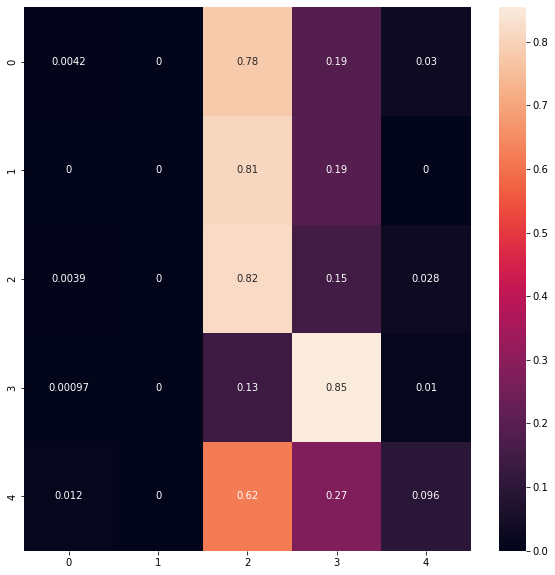

In [15]:
df_ADA= error_modelo(ADA,X_test,y_test)
df_ADA.columns=['ADA']
df_ADA

Accuracy 0.6991094147582697
F1 0.3396319435117951
Precision 0.4056174289289184
Recall 0.35533062317403974
------------------------------
ROC 0.7438492927602388


,BAG
accuracy,0.699109
f-1,0.339632
recall,0.355331
precision,0.405617


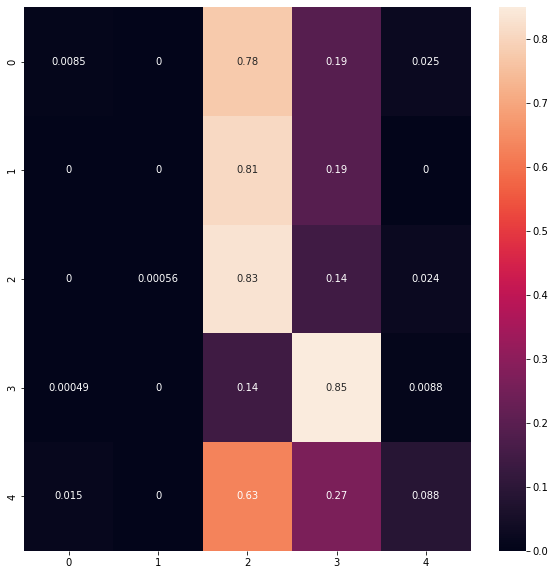

In [16]:
df_BAG= error_modelo(BAG,X_test,y_test)
df_BAG.columns=['BAG']
df_BAG


Accuracy 0.6974130619168787
F1 0.34017715348841115
Precision 0.3878614353797647
Recall 0.3550344628974059
------------------------------
ROC 0.7002393292584196


,DTC
accuracy,0.697413
f-1,0.340177
recall,0.355034
precision,0.387861


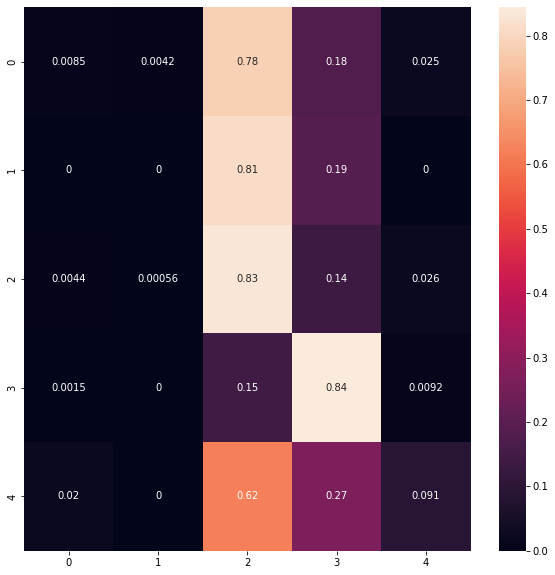

In [17]:
df_DTC= error_modelo(DTC,X_test,y_test)
df_DTC.columns=['DTC']
df_DTC

c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy 0.6967769296013571
F1 0.34125970752451085
Precision 0.3887287440866466
Recall 0.35543283283644395
------------------------------
ROC 0.7025547485277112


,RND
accuracy,0.696777
f-1,0.341260
recall,0.355433
precision,0.388729


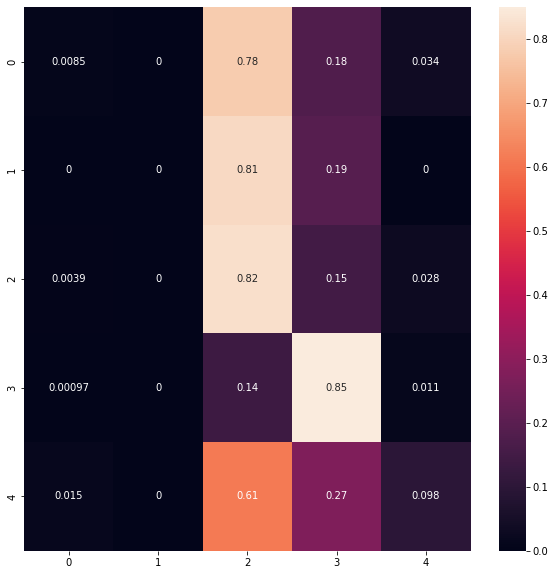

In [18]:
df_RND= error_modelo(RND,X_test,y_test)
df_RND.columns=['RND']
df_RND

Accuracy 0.7035623409669212
F1 0.33075823041714053
Precision 0.42541791426206566
Recall 0.3525284801910022
------------------------------
ROC 0.724511737169128


c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,GBCT
accuracy,0.703562
f-1,0.330758
recall,0.352528
precision,0.425418


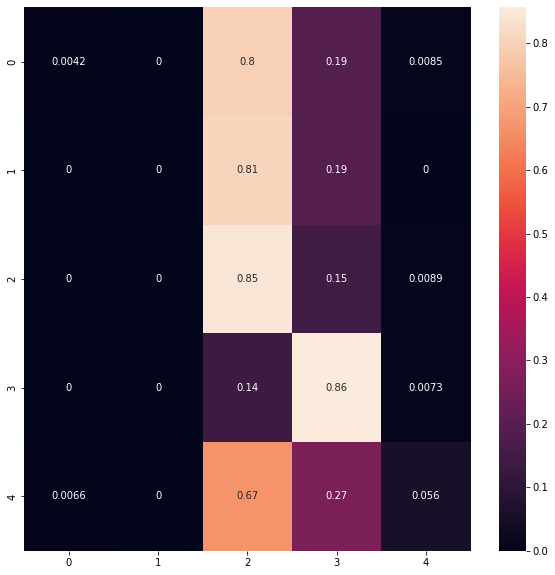

In [19]:
df_GBCT= error_modelo(GBCT,X_test,y_test)
df_GBCT.columns=['GBCT']
df_GBCT

c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Accuracy 0.5125106022052587
F1 0.23246905571077364
Precision 0.2213015858541681
Recall 0.254839917037856
------------------------------
ROC 0.5611808079065893


c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


,KNN
accuracy,0.512511
f-1,0.232469
recall,0.254840
precision,0.221302


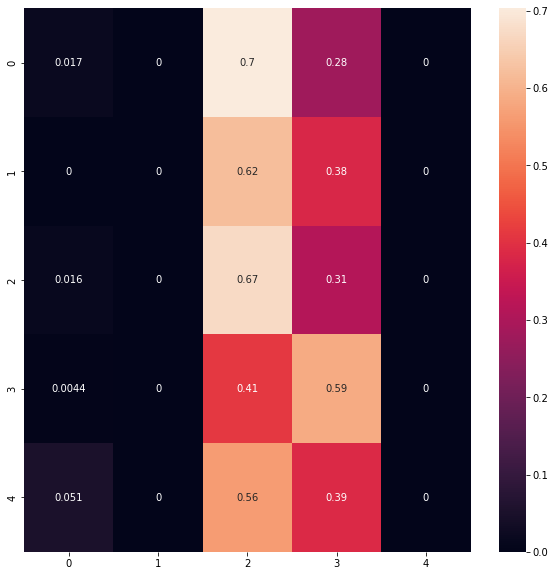

In [20]:
df_KNN= error_modelo(KNN,X_test,y_test)
df_KNN.columns=['KNN']
df_KNN

Accuracy 0.6942324003392706
F1 0.30528177125509764
Precision 0.27859817283211025
Recall 0.3393085485084658
------------------------------
ROC 0.7132963496898228


c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,LOGREG
accuracy,0.694232
f-1,0.305282
recall,0.339309
precision,0.278598


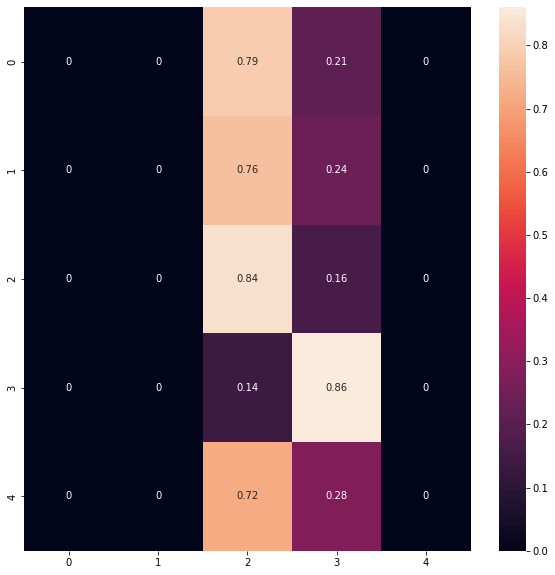

In [21]:
df_LOGREG= error_modelo(LOGREG,X_test,y_test)
df_LOGREG.columns=['LOGREG']
df_LOGREG

Se puede ver que *ninguno de los modelos se adapta mejor* a los datos al realizar RESAMPLE, por lo que apartamos este camino en vista a estos datos. 

In [22]:
df_errores=pd.DataFrame()
df_errores=pd.concat([df_ADA,df_BAG,df_DTC,df_RND,df_GBCT,df_KNN,df_LOGREG],axis=1)
df_errores

,ADA,BAG,DTC,RND,GBCT,KNN,LOGREG
accuracy,0.696353,0.699109,0.697413,0.696777,0.703562,0.512511,0.694232
f-1,0.338989,0.339632,0.340177,0.341260,0.330758,0.232469,0.305282
recall,0.354130,0.355331,0.355034,0.355433,0.352528,0.254840,0.339309
precision,0.379732,0.405617,0.387861,0.388729,0.425418,0.221302,0.278598
